## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# display graphs without needing to call them

%matplotlib inline

In [3]:
# create file path and import dataset
path = r'C:\Users\krist\ATX Metro Bike\02.Data'
metrobikes = pd.read_pickle(os.path.join(path, 'PreparedData', 'metrobikes_TimeAsFloats.pkl'))
metrobikes.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Trip Time mins,Month,Year,...,Checkout Day of Month,Checkout Hour of Day,Checkout Kiosk Latitude,Checkout Kiosk Longitude,Return Kiosk Latitude,Return Kiosk Longitude,Trip Time Category,Kiosk_Zipcode,Checkout time float,Return time float
0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,3,12,2017,...,1,9,30.269800,-97.741859,30.266340,-97.743782,Short trip,78701.0,9.850000,9.900000
1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,14,3,2015,...,13,16,30.266340,-97.743782,30.266340,-97.743782,Typical Trip,78701.0,16.333333,16.566667
2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,22,10,2014,...,14,8,30.263041,-97.758240,30.264460,-97.756653,Typical Trip,78704.0,8.550000,8.916667
3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,29,10,2014,...,14,8,30.267799,-97.751892,30.269800,-97.741859,Typical Trip,78701.0,8.533333,9.016667
4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,10,3,2015,...,13,16,30.289530,-97.736954,30.259411,-97.749710,Typical Trip,78712.0,16.333333,16.500000


In [4]:
#check shape 
metrobikes.shape

(1844301, 30)

In [5]:
#check column names for categorical variables
metrobikes.columns

Index(['Trip ID', 'Membership Type', 'Bicycle ID', 'Bike Type',
       'Checkout Datetime', 'Checkout Date', 'Checkout Time', 'Trip Time mins',
       'Month', 'Year', 'Checkout Name Current', 'Checkout Kiosk ID current',
       'Checkout Kiosk Status', 'Checkout Kiosk Geographic Location',
       'Checkout Kiosk Dock Count', 'Return Name Current',
       'Return Kiosk ID current', 'Return Kiosk Status',
       'Return Kiosk Geographic Location', 'Return Kiosk Dock Count',
       'Checkout Day of Month', 'Checkout Hour of Day',
       'Checkout Kiosk Latitude', 'Checkout Kiosk Longitude',
       'Return Kiosk Latitude', 'Return Kiosk Longitude', 'Trip Time Category',
       'Kiosk_Zipcode', 'Checkout time float', 'Return time float'],
      dtype='object')

In [6]:
#create subset without categorical variables
subset_cols = ['Trip Time mins','Checkout time float', 'Return time float']
bike_subset = metrobikes[subset_cols]
bike_subset.head()

,Trip Time mins,Checkout time float,Return time float
0,3,9.850000,9.900000
1,14,16.333333,16.566667
2,22,8.550000,8.916667
3,29,8.533333,9.016667
4,10,16.333333,16.500000


## 2. Use elbow technique to define the optimal number of clusters

In [7]:
#define cluster range of 1 to 10
num_cl = range(1, 10)

#define clusters in the range assigned above
kmeans = [KMeans(n_clusters=i, init='k-means++') for i in num_cl]

In [8]:
#create score representing rate of variation for given cluster
score = [kmeans[i].fit(bike_subset).score(bike_subset) for i in range(len(kmeans))]
score

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\clust

[-1942006821.7764418,
 -878108064.2536898,
 -463401861.6413775,
 -303573052.8756289,
 -227574844.17819288,
 -179318965.55199057,
 -143907407.57660764,
 -118920775.93132773,
 -102348270.6167661]

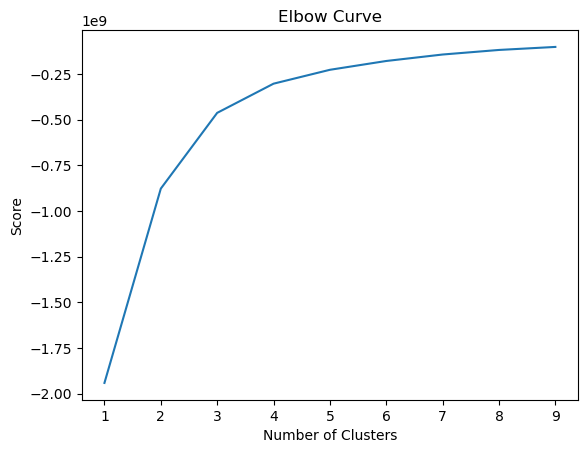

In [9]:
#create plot of the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### curve begins to level off after 4 clusters so will use 4 for analysis

## 3. Conduct K-means clustering

In [10]:
#create kmeans
kmeans = KMeans(n_clusters = 4) 

In [11]:
#fit to data
kmeans.fit(bike_subset)

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
#add clusters column to dataframe
bike_subset['clusters'] = kmeans.fit_predict(bike_subset)
bike_subset.head()

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\krist\AppData\Local\Temp\ipykernel_8600\3533012263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_subset['clusters'] = kmeans.fit_predict(bike_subset)


,Trip Time mins,Checkout time float,Return time float,clusters
0,3,9.850000,9.900000,0
1,14,16.333333,16.566667,0
2,22,8.550000,8.916667,0
3,29,8.533333,9.016667,1
4,10,16.333333,16.500000,0


In [13]:
#check frequencies of clusters
bike_subset['clusters'].value_counts()

0    1370876
1     385161
2      75852
3      12412
Name: clusters, dtype: int64

## 4. Plot clusters

C:\Users\krist\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


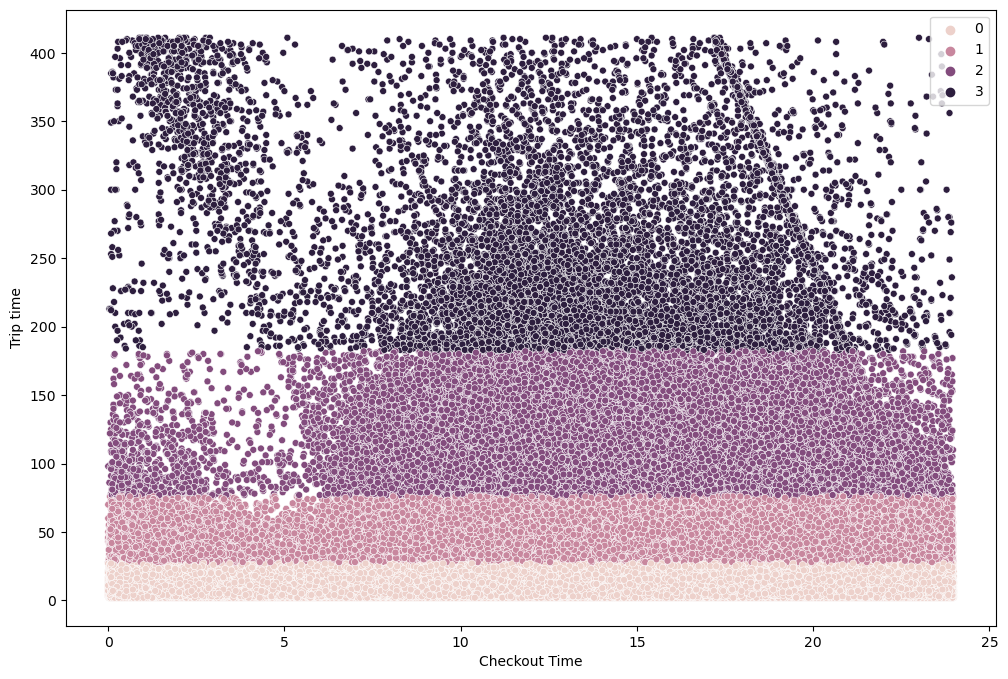

In [14]:
#plot the clusters for the checkout time and trip time
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bike_subset['Checkout time float'], 
                     y=bike_subset['Trip Time mins'], hue=kmeans.labels_, s=25) 

#remove grid and label axes
ax.grid(False)
plt.xlabel('Checkout Time')
plt.ylabel('Trip time') 
plt.show()

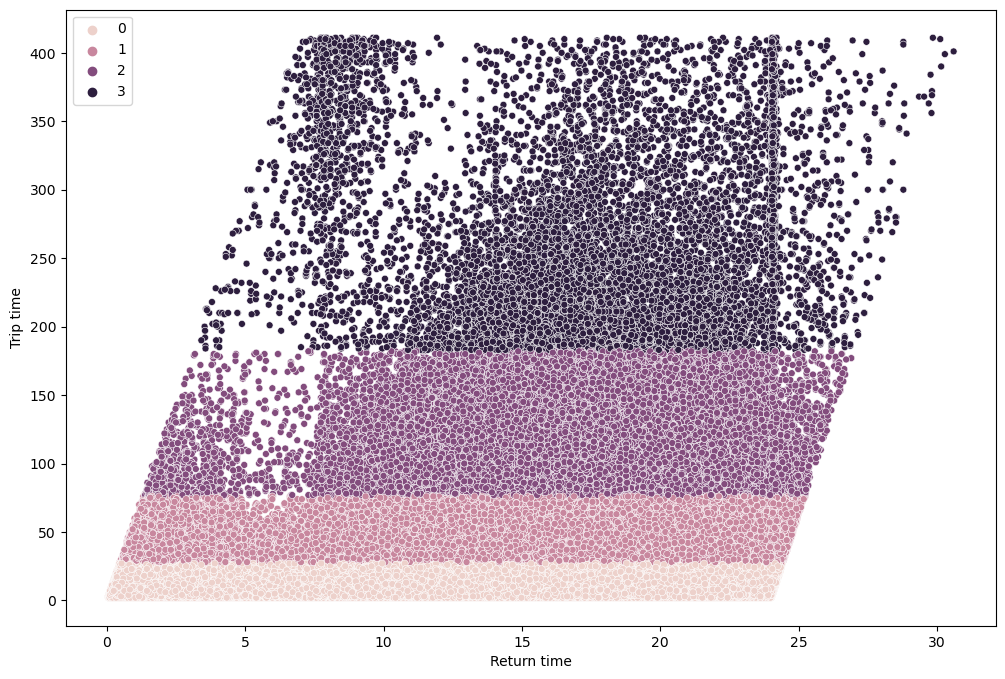

In [15]:
#plot the clusters for the checkout time and trip time
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bike_subset['Return time float'], 
                     y=bike_subset['Trip Time mins'], hue=kmeans.labels_, s=25) 

#remove grid and label axes
ax.grid(False)
plt.xlabel('Return time')
plt.ylabel('Trip time') 
plt.show()

### clusters are based on trip time rather than a combination of checkout/return time and trip time. Trip times in every cluster happen at every return and checkout time. Cluster analysis only helps drive home that neither checkout time nor return time impact trip time dramatically. Perhaps other categorical variables do have an impact. Perhaps density based clustering would work better for this dataset? 

In [16]:
#rename columns
bike_subset.loc[bike_subset['clusters'] == 3, 'cluster_color'] = 'dark purple'
bike_subset.loc[bike_subset['clusters'] == 2, 'cluster_color'] = 'purple'
bike_subset.loc[bike_subset['clusters'] == 1, 'cluster_color'] = 'pink'
bike_subset.loc[bike_subset['clusters'] == 0, 'cluster_color'] = 'light pink'

C:\Users\krist\AppData\Local\Temp\ipykernel_8600\753822058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_subset.loc[bike_subset['clusters'] == 3, 'cluster_color'] = 'dark purple'


In [17]:
bike_subset.groupby('cluster_color').agg({'Trip Time mins':['mean', 'median'],
                                    'Checkout time float':['mean', 'median'], 
                                    'Return time float':['mean', 'median']})

Trip Time mins        Checkout time float             \
                        mean median                mean     median   
cluster_color                                                        
dark purple       256.102401  236.0           13.298597  13.450000   
light pink         10.337909    8.0           14.963984  15.366667   
pink               44.463614   43.0           14.960789  14.966667   
purple            109.436468  102.0           14.278817  14.133333   

              Return time float             
                           mean     median  
cluster_color                               
dark purple           17.566970  17.450000  
light pink            15.136283  15.550000  
pink                  15.701849  15.716667  
purple                16.102758  15.966667

### the cluster with the longest trip times also has the earliest mean and median checkout times
### the cluster with the shortest trip times has the latest mean and median checkout times